In [ ]:
#Importing all libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import math

### Adding the data

In [ ]:
DATA_DIR = "../input/ai511-homeloan-2022"

In [ ]:
df = pd.read_csv(os.path.join(DATA_DIR, "train_data.csv"))

In [ ]:
df.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
0,450407,Cash loans,F,N,Y,1,67500.0,227520.0,11065.5,180000.0,...,0,0,0,0.0,0.0,0.0,1.0,0.0,2.0,0
1,271298,Cash loans,M,Y,Y,1,247500.0,1882372.5,65560.5,1719000.0,...,0,0,0,0.0,0.0,0.0,0.0,1.0,3.0,0
2,122238,Cash loans,M,Y,Y,1,180000.0,101880.0,10827.0,90000.0,...,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0,0
3,305311,Cash loans,M,N,N,0,81000.0,405000.0,20677.5,405000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,0
4,414121,Cash loans,F,N,Y,0,157500.0,888840.0,29506.5,675000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,0


Dropping the SK_ID_CURR column as it is just the ID.

In [ ]:
df=df.drop("SK_ID_CURR",axis=1)

In [ ]:
df.shape

(184506, 121)

Target Distribution

We see more than 91% data is 0 i.e has paid the loan.

In [ ]:
df["TARGET"].value_counts(normalize=True) * 100

0    91.927092
1     8.072908
Name: TARGET, dtype: float64

Checking for the NULL values 

In [ ]:
df.isna().any()

NAME_CONTRACT_TYPE            False
CODE_GENDER                   False
FLAG_OWN_CAR                  False
FLAG_OWN_REALTY               False
CNT_CHILDREN                  False
                              ...  
AMT_REQ_CREDIT_BUREAU_WEEK     True
AMT_REQ_CREDIT_BUREAU_MON      True
AMT_REQ_CREDIT_BUREAU_QRT      True
AMT_REQ_CREDIT_BUREAU_YEAR     True
TARGET                        False
Length: 121, dtype: bool

In [ ]:
df.columns = df.columns.str.lower()

### Extracting the Categorical columns

In [ ]:

 categorical_data = [
     'name_contract_type',
     'code_gender',
     'name_type_suite',
     'name_income_type',
     'name_education_type',
     'name_family_status',
     'name_housing_type',
     'occupation_type',
     'weekday_appr_process_start',
     'organization_type',
     'fondkapremont_mode',
     'housetype_mode',
     'wallsmaterial_mode',
     'emergencystate_mode',
     'flag_own_car',
     'flag_own_realty',
     'flag_mobil',
     'flag_emp_phone',
     'flag_work_phone',
     'flag_cont_mobile',
     'flag_phone',
     'flag_email',
     'flag_document_2',
     'flag_document_3',
     'flag_document_4',
     'flag_document_5',
     'flag_document_6',
     'flag_document_7',
     'flag_document_8',
     'flag_document_9',
     'flag_document_10',
     'flag_document_11',
     'flag_document_12',
     'flag_document_13',
     'flag_document_14',
     'flag_document_15',
     'flag_document_16',
     'flag_document_17',
     'flag_document_18',
     'flag_document_19',
     'flag_document_20',
     'flag_document_21',
     'cnt_children',
     'cnt_fam_members',
     'region_rating_client',
     'region_rating_client_w_city',
     'reg_region_not_live_region',
     'reg_region_not_work_region',
     'live_region_not_work_region',
     'reg_city_not_live_city',
     'reg_city_not_work_city',
     'live_city_not_work_city',
     'amt_req_credit_bureau_hour',
     'amt_req_credit_bureau_day',
     'amt_req_credit_bureau_week',
     'amt_req_credit_bureau_mon',
     'amt_req_credit_bureau_qrt',
     'amt_req_credit_bureau_year',
     'obs_30_cnt_social_circle',
     'def_30_cnt_social_circle',
     'obs_60_cnt_social_circle',
     'def_60_cnt_social_circle'
 ]

categorical_data

['name_contract_type',
 'code_gender',
 'name_type_suite',
 'name_income_type',
 'name_education_type',
 'name_family_status',
 'name_housing_type',
 'occupation_type',
 'weekday_appr_process_start',
 'organization_type',
 'fondkapremont_mode',
 'housetype_mode',
 'wallsmaterial_mode',
 'emergencystate_mode',
 'flag_own_car',
 'flag_own_realty',
 'flag_mobil',
 'flag_emp_phone',
 'flag_work_phone',
 'flag_cont_mobile',
 'flag_phone',
 'flag_email',
 'flag_document_2',
 'flag_document_3',
 'flag_document_4',
 'flag_document_5',
 'flag_document_6',
 'flag_document_7',
 'flag_document_8',
 'flag_document_9',
 'flag_document_10',
 'flag_document_11',
 'flag_document_12',
 'flag_document_13',
 'flag_document_14',
 'flag_document_15',
 'flag_document_16',
 'flag_document_17',
 'flag_document_18',
 'flag_document_19',
 'flag_document_20',
 'flag_document_21',
 'cnt_children',
 'cnt_fam_members',
 'region_rating_client',
 'region_rating_client_w_city',
 'reg_region_not_live_region',
 'reg_regi

### Columns having numerical values

In [ ]:
num_data = df.columns.drop(categorical_data + ["target"]).to_list()
len(num_data)

58

### Printing the NULL Values Percentage 

In [ ]:
for col in categorical_data:
    print(f"{col}: {sum(df[col].isna()) / len(df) * 100}")

name_contract_type: 0.0
code_gender: 0.0
name_type_suite: 0.41733060171484937
name_income_type: 0.0
name_education_type: 0.0
name_family_status: 0.0
name_housing_type: 0.0
occupation_type: 31.363207700562583
weekday_appr_process_start: 0.0
organization_type: 0.0
fondkapremont_mode: 68.42812699858
housetype_mode: 50.12411520492559
wallsmaterial_mode: 50.79563808223039
emergencystate_mode: 47.33504601476375
flag_own_car: 0.0
flag_own_realty: 0.0
flag_mobil: 0.0
flag_emp_phone: 0.0
flag_work_phone: 0.0
flag_cont_mobile: 0.0
flag_phone: 0.0
flag_email: 0.0
flag_document_2: 0.0
flag_document_3: 0.0
flag_document_4: 0.0
flag_document_5: 0.0
flag_document_6: 0.0
flag_document_7: 0.0
flag_document_8: 0.0
flag_document_9: 0.0
flag_document_10: 0.0
flag_document_11: 0.0
flag_document_12: 0.0
flag_document_13: 0.0
flag_document_14: 0.0
flag_document_15: 0.0
flag_document_16: 0.0
flag_document_17: 0.0
flag_document_18: 0.0
flag_document_19: 0.0
flag_document_20: 0.0
flag_document_21: 0.0
cnt_child

In [ ]:
for col in num_data:
    print(f"{col}: {sum(df[col].isna()) / len(df) * 100}")

amt_income_total: 0.0
amt_credit: 0.0
amt_annuity: 0.003251926766609216
amt_goods_price: 0.09051196167062318
region_population_relative: 0.0
days_birth: 0.0
days_employed: 0.0
days_registration: 0.0
days_id_publish: 0.0
own_car_age: 65.92360140049645
hour_appr_process_start: 0.0
ext_source_1: 56.40683771801459
ext_source_2: 0.223840959101601
ext_source_3: 19.867104592804573
apartments_avg: 50.7165078642429
basementarea_avg: 58.521132104105014
years_beginexpluatation_avg: 48.724702719694754
years_build_avg: 66.53279568144126
commonarea_avg: 69.90070783605952
elevators_avg: 53.28823994883635
entrances_avg: 50.30026123811692
floorsmax_avg: 49.71437243233282
floorsmin_avg: 67.88071932620078
landarea_avg: 59.37096896577889
livingapartments_avg: 68.40536351121372
livingarea_avg: 50.1522985702362
nonlivingapartments_avg: 69.45356790565076
nonlivingarea_avg: 55.16785361993648
apartments_mode: 50.7165078642429
basementarea_mode: 58.521132104105014
years_beginexpluatation_mode: 48.72470271969475

### Removing the rows NULL Values less than 1%

In [ ]:
threshold = 1 / 100
toDrop = [col for col in categorical_data if sum(df[col].isna()) / len(df) < threshold]
toDrop.extend(col for col in num_data if sum(df[col].isna()) / len(df) < threshold)

for col in toDrop:
    null_rows = df[col].isna()
    prop = sum(null_rows) / len(df)
    if prop < threshold:
        df = df.dropna(subset=[col])

In [ ]:
df.shape

(182683, 121)

### Dropping the columns having NULL more than 66%

In [ ]:
threshold = 66 / 100
toDrop = [col for col in categorical_data if sum(df[col].isna()) / len(df) > threshold]
toDrop.extend(col for col in num_data if sum(df[col].isna()) / len(df) > threshold)

dropped = []

for col in toDrop:
    null_cols = df[col].isna()
    prop = sum(null_cols) / len(df)
    if prop > threshold:
        dropped.append(col)
        df = df.drop(col, axis=1)
        
dropped

['fondkapremont_mode',
 'years_build_avg',
 'commonarea_avg',
 'floorsmin_avg',
 'livingapartments_avg',
 'nonlivingapartments_avg',
 'years_build_mode',
 'commonarea_mode',
 'floorsmin_mode',
 'livingapartments_mode',
 'nonlivingapartments_mode',
 'years_build_medi',
 'commonarea_medi',
 'floorsmin_medi',
 'livingapartments_medi',
 'nonlivingapartments_medi']

In [ ]:
num_data = [col for col in num_data if col not in dropped]

num_data

['amt_income_total',
 'amt_credit',
 'amt_annuity',
 'amt_goods_price',
 'region_population_relative',
 'days_birth',
 'days_employed',
 'days_registration',
 'days_id_publish',
 'own_car_age',
 'hour_appr_process_start',
 'ext_source_1',
 'ext_source_2',
 'ext_source_3',
 'apartments_avg',
 'basementarea_avg',
 'years_beginexpluatation_avg',
 'elevators_avg',
 'entrances_avg',
 'floorsmax_avg',
 'landarea_avg',
 'livingarea_avg',
 'nonlivingarea_avg',
 'apartments_mode',
 'basementarea_mode',
 'years_beginexpluatation_mode',
 'elevators_mode',
 'entrances_mode',
 'floorsmax_mode',
 'landarea_mode',
 'livingarea_mode',
 'nonlivingarea_mode',
 'apartments_medi',
 'basementarea_medi',
 'years_beginexpluatation_medi',
 'elevators_medi',
 'entrances_medi',
 'floorsmax_medi',
 'landarea_medi',
 'livingarea_medi',
 'nonlivingarea_medi',
 'totalarea_mode',
 'days_last_phone_change']

In [ ]:
categorical_data = [col for col in categorical_data if col not in dropped]
categorical_data

['name_contract_type',
 'code_gender',
 'name_type_suite',
 'name_income_type',
 'name_education_type',
 'name_family_status',
 'name_housing_type',
 'occupation_type',
 'weekday_appr_process_start',
 'organization_type',
 'housetype_mode',
 'wallsmaterial_mode',
 'emergencystate_mode',
 'flag_own_car',
 'flag_own_realty',
 'flag_mobil',
 'flag_emp_phone',
 'flag_work_phone',
 'flag_cont_mobile',
 'flag_phone',
 'flag_email',
 'flag_document_2',
 'flag_document_3',
 'flag_document_4',
 'flag_document_5',
 'flag_document_6',
 'flag_document_7',
 'flag_document_8',
 'flag_document_9',
 'flag_document_10',
 'flag_document_11',
 'flag_document_12',
 'flag_document_13',
 'flag_document_14',
 'flag_document_15',
 'flag_document_16',
 'flag_document_17',
 'flag_document_18',
 'flag_document_19',
 'flag_document_20',
 'flag_document_21',
 'cnt_children',
 'cnt_fam_members',
 'region_rating_client',
 'region_rating_client_w_city',
 'reg_region_not_live_region',
 'reg_region_not_work_region',
 '

In [ ]:
df.shape

(182683, 105)

In [ ]:
df.head()

,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,name_type_suite,...,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year,target
0,Cash loans,F,N,Y,1,67500.0,227520.0,11065.5,180000.0,Family,...,0,0,0,0.0,0.0,0.0,1.0,0.0,2.0,0
1,Cash loans,M,Y,Y,1,247500.0,1882372.5,65560.5,1719000.0,Unaccompanied,...,0,0,0,0.0,0.0,0.0,0.0,1.0,3.0,0
2,Cash loans,M,Y,Y,1,180000.0,101880.0,10827.0,90000.0,"Spouse, partner",...,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0,0
3,Cash loans,M,N,N,0,81000.0,405000.0,20677.5,405000.0,Unaccompanied,...,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,0
4,Cash loans,F,N,Y,0,157500.0,888840.0,29506.5,675000.0,Unaccompanied,...,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,0


In [ ]:
df["target"].value_counts(normalize=True) * 100

0    91.894703
1     8.105297
Name: target, dtype: float64

### Checking for correlated data 

In [ ]:
corr = df.corr()["target"].sort_values()
top_negative_corr = corr.head(10)
top_positive_corr = corr.tail(10)
print("****Top negative corrolation: ") 
print(top_negative_corr)
print("****Top positive corrolations: ")
print(top_positive_corr)

****Top negative corrolation: 
ext_source_3                 -0.177967
ext_source_2                 -0.161554
ext_source_1                 -0.156339
days_employed                -0.047207
floorsmax_medi               -0.044904
floorsmax_avg                -0.044677
floorsmax_mode               -0.044280
amt_goods_price              -0.040059
region_population_relative   -0.038816
elevators_avg                -0.035846
Name: target, dtype: float64
****Top positive corrolations: 
flag_emp_phone                 0.048291
days_id_publish                0.050951
reg_city_not_work_city         0.052528
days_last_phone_change         0.053409
region_rating_client           0.061517
region_rating_client_w_city    0.063418
days_birth                     0.081196
target                         1.000000
flag_mobil                          NaN
flag_document_12                    NaN
Name: target, dtype: float64


### Violin Plot some important features with respect to Target

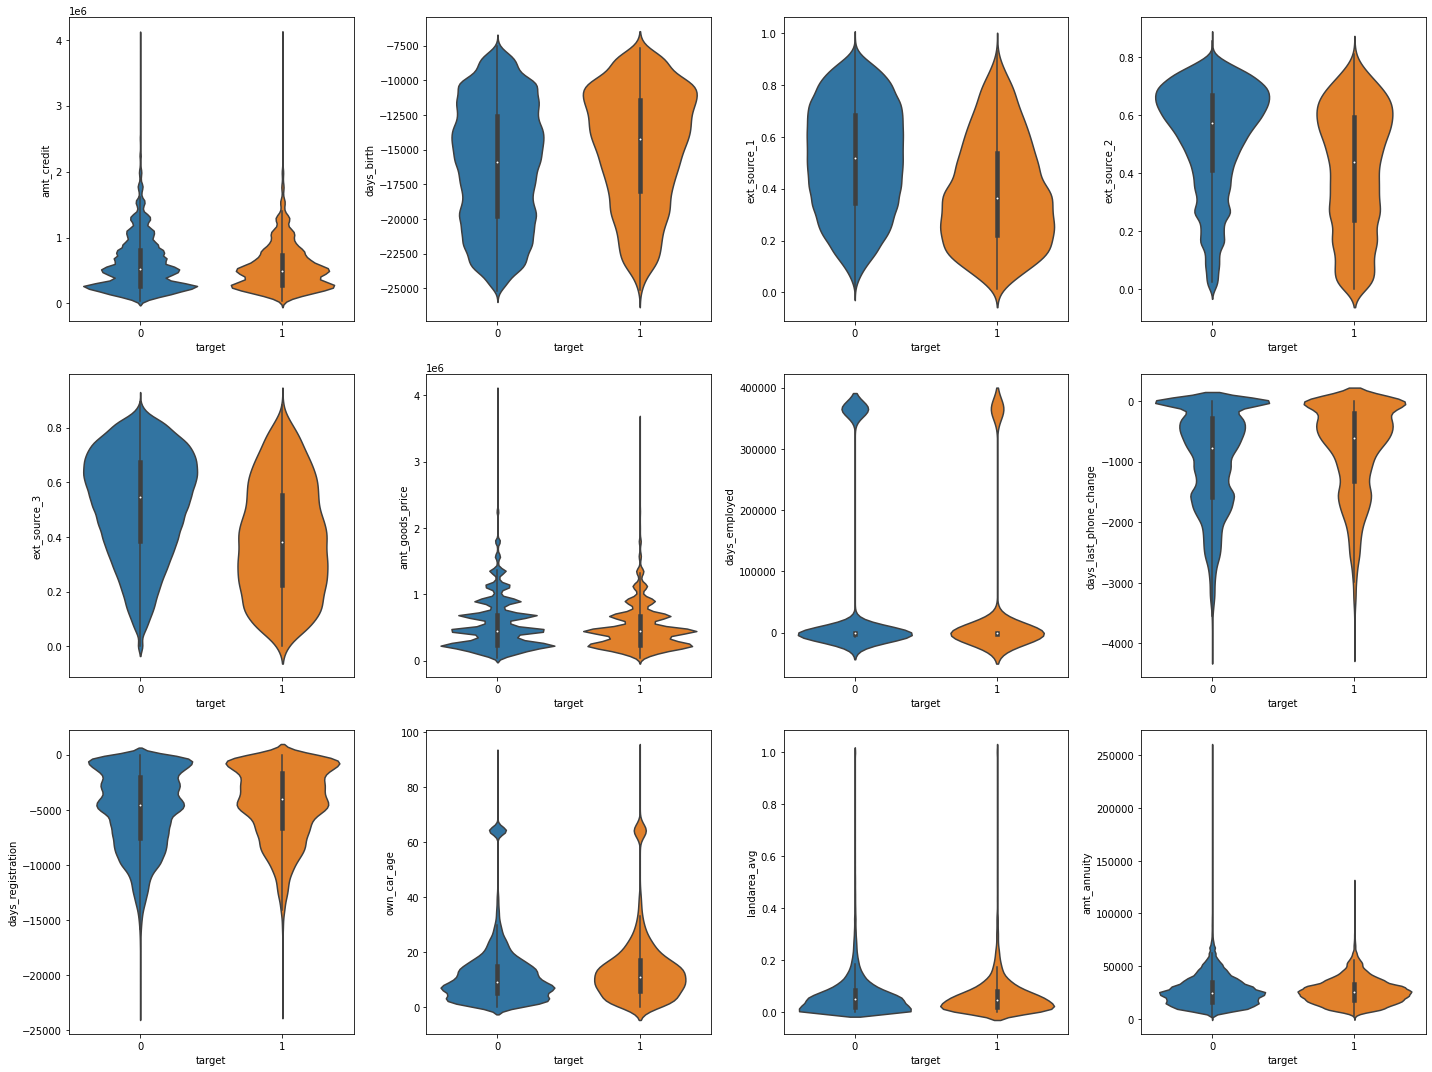

In [ ]:
use = [
    "amt_credit",
    "days_birth",
    "ext_source_1",
    "ext_source_2",
    "ext_source_3",
    "amt_goods_price",
    "days_employed",
    "days_last_phone_change",
    "days_registration",
    "own_car_age",
    'landarea_avg',
    "amt_annuity",
    'days_last_phone_change',
    "amt_income_total",
]
f, axes = plt.subplots(3, 4, figsize=(20, 15))

for col, ax in zip(use, axes.flat):
    sns.violinplot(data=df, x="target", y=col, ax=ax)
    
plt.tight_layout()

From above we notice : 
*      days_birth, ext_source_1, ext_source_2 and ext_source_3 shows a lot of difference with respect to target
*      Other features also have differences with respect to target

### Filling Median in the NULL Values for numerical data

In [ ]:
for col in num_data:
    df.loc[df[col].isna(), col] = df[col].median()
df[num_data].isna().any()

amt_income_total                False
amt_credit                      False
amt_annuity                     False
amt_goods_price                 False
region_population_relative      False
days_birth                      False
days_employed                   False
days_registration               False
days_id_publish                 False
own_car_age                     False
hour_appr_process_start         False
ext_source_1                    False
ext_source_2                    False
ext_source_3                    False
apartments_avg                  False
basementarea_avg                False
years_beginexpluatation_avg     False
elevators_avg                   False
entrances_avg                   False
floorsmax_avg                   False
landarea_avg                    False
livingarea_avg                  False
nonlivingarea_avg               False
apartments_mode                 False
basementarea_mode               False
years_beginexpluatation_mode    False
elevators_mo

### Filling the NULL values for Categorical data with mode 

In [ ]:
for col in categorical_data:
    df.loc[df[col].isna(), col] = df[col].mode()[0]
df[categorical_data].isna().any()

name_contract_type            False
code_gender                   False
name_type_suite               False
name_income_type              False
name_education_type           False
                              ...  
amt_req_credit_bureau_year    False
obs_30_cnt_social_circle      False
def_30_cnt_social_circle      False
obs_60_cnt_social_circle      False
def_60_cnt_social_circle      False
Length: 61, dtype: bool

# PLOTTING HISTOGRAM TO CHECK SKEWNESS


In [ ]:
len(num_data)

43

In [ ]:
for col in num_data:
  sns.displot(df, x=col, hue='target')

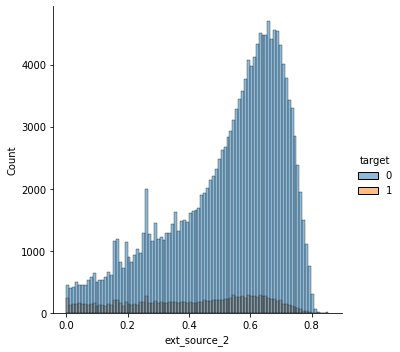

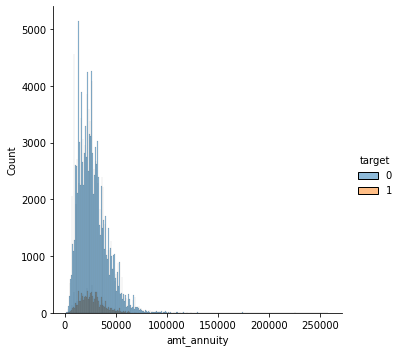

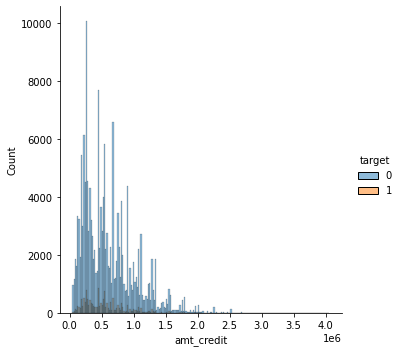

In [ ]:
skew = [
    "ext_source_2",
    "amt_annuity",
    "amt_credit"
]
for col in skew:
  sns.displot(df, x=col, hue='target')

In [ ]:
df['ext_source_2'] = df['ext_source_2'].apply(lambda x: x*x)
# df['days_registration'] = df['days_registration'].apply(lambda x: math.log(x,10))

In [ ]:
df['amt_annuity'] = df['amt_annuity'].apply(lambda x: math.pow(x,1/3))
df['amt_credit'] = df['amt_credit'].apply(lambda x: math.pow(x,1/3))

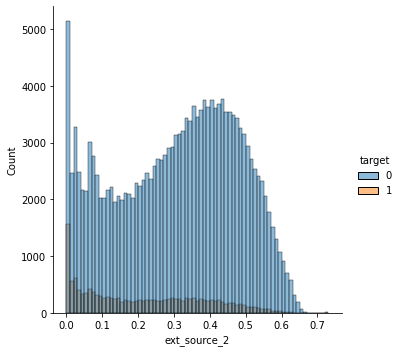

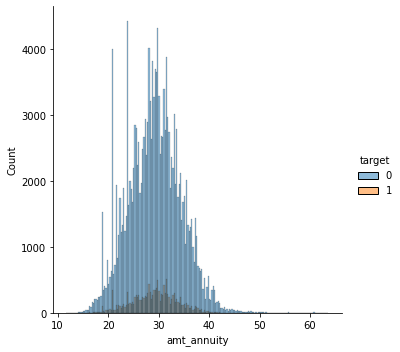

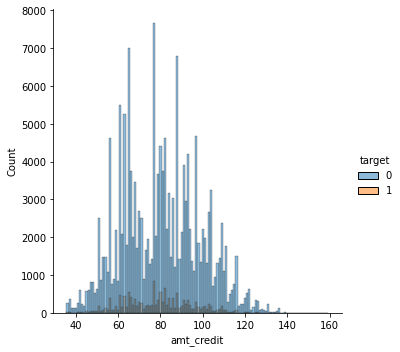

In [ ]:
for col in skew:
  sns.displot(df, x=col, hue='target')

In [ ]:
for col in num_data:
  sns.catplot(kind="box", x="target", y=col, data=df)

### Scaling the Data with Min Max Normalization

In [ ]:
scaler = preprocessing.MinMaxScaler()
df[num_data] = scaler.fit_transform(df[num_data].to_numpy())
df[num_data].describe()

,amt_income_total,amt_credit,amt_annuity,amt_goods_price,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,own_car_age,...,basementarea_medi,years_beginexpluatation_medi,elevators_medi,entrances_medi,floorsmax_medi,landarea_medi,livingarea_medi,nonlivingarea_medi,totalarea_mode,days_last_phone_change
count,182683.000000,182683.000000,182683.000000,182683.000000,182683.000000,182683.000000,182683.000000,182683.000000,182683.000000,182683.000000,...,182683.000000,182683.000000,182683.000000,182683.000000,182683.000000,182683.000000,182683.000000,182683.000000,182683.000000,182683.000000
mean,0.001220,0.360639,0.335571,0.124282,0.284514,0.517191,0.213418,0.787079,0.530835,0.110354,...,0.080638,0.979677,0.036166,0.143422,0.196162,0.056272,0.091345,0.014230,0.085979,0.769524
std,0.002525,0.149331,0.099468,0.091985,0.190913,0.246133,0.368819,0.150473,0.236556,0.078089,...,0.053239,0.042148,0.098996,0.070987,0.106884,0.053228,0.080771,0.048268,0.078633,0.197758
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000739,0.234710,0.265107,0.049383,0.134537,0.311822,0.039548,0.680347,0.326336,0.098901,...,0.075600,0.981600,0.000000,0.137900,0.166700,0.048800,0.074600,0.003000,0.066800,0.624612
50%,0.001046,0.361112,0.336730,0.102132,0.257000,0.533424,0.043585,0.807439,0.489895,0.098901,...,0.075600,0.981600,0.000000,0.137900,0.166700,0.048800,0.074600,0.003000,0.068700,0.818399
75%,0.001508,0.465124,0.401763,0.159371,0.392880,0.721545,0.045994,0.914460,0.730221,0.098901,...,0.075600,0.982100,0.000000,0.137900,0.166700,0.048800,0.074600,0.003000,0.070200,0.934528
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### One Hot Encoding 

In [ ]:
df[categorical_data] = df[categorical_data].astype("category")
df_encode = pd.get_dummies(df)
df_encode.shape

(182683, 433)

In [ ]:
df_encode.head()

,amt_income_total,amt_credit,amt_annuity,amt_goods_price,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,own_car_age,...,amt_req_credit_bureau_year_12.0,amt_req_credit_bureau_year_13.0,amt_req_credit_bureau_year_14.0,amt_req_credit_bureau_year_15.0,amt_req_credit_bureau_year_16.0,amt_req_credit_bureau_year_17.0,amt_req_credit_bureau_year_19.0,amt_req_credit_bureau_year_20.0,amt_req_credit_bureau_year_23.0,amt_req_credit_bureau_year_25.0
0,0.000354,0.205761,0.203163,0.034792,0.254009,0.451163,0.044729,0.761701,0.881717,0.098901,...,0,0,0,0,0,0,0,0,0,0
1,0.001893,0.709870,0.550532,0.418631,0.257000,0.370427,0.046498,0.756107,0.659251,0.274725,...,0,0,0,0,0,0,0,0,0,0
2,0.001316,0.089930,0.200058,0.012346,0.309272,0.595754,0.030750,0.924154,0.284349,0.098901,...,0,0,0,0,0,0,0,0,0,0
3,0.000469,0.310244,0.302595,0.090909,0.491595,0.702292,0.031374,0.725401,0.276516,0.098901,...,0,0,0,0,0,0,0,0,0,0
4,0.001123,0.489214,0.369103,0.158249,0.256321,0.500903,0.045848,0.939657,0.275576,0.098901,...,0,0,0,0,0,0,0,0,0,0


### To CSV file

In [ ]:
df_encode.to_csv('processedTraining.csv', index=False)